In [30]:
from pyspark.sql import SparkSession

In [31]:
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [33]:
spark.stop()

In [35]:
from pyspark import SparkConf, SparkContext

In [36]:
conf = SparkConf()
conf.setMaster('local')
conf.setAppName('spark-basic')
sc = SparkContext(conf = conf)

In [37]:
sc

<SparkContext master=local appName=spark-basic>

In [8]:
import os
os.chdir('..')

In [42]:
spark = SparkSession.builder \
    .master("local") \
    .appName("Word Count") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [43]:
spark

In [11]:
os.getcwd()

'/Users/ksunil/Desktop/Karan/Codebase'

In [58]:
def get_depth_predictions(reef_name):
    depth_predictions_fp = os.path.join('data',reef_name, 'Output', 'Depth Predictions','CSV_files')
    cwd = os.getcwd()
    for i,f in enumerate(os.listdir(depth_predictions_fp)):
        if f == '.DS_Store': continue
        
        data_fp = os.path.join(depth_predictions_fp, f)
        fp = 'file://' + cwd + '/' + data_fp
        if i == 1:
            temp = spark.read.csv(fp,header = True, inferSchema = True)
            df = temp
        else:
            temp = spark.read.csv(fp,header = True, inferSchema = True)
            df = df.unionAll(temp)
    return df


In [59]:
moce = get_depth_predictions('Moce')

In [61]:
len(moce)

TypeError: object of type 'DataFrame' has no len()

In [62]:
moce.count()

IllegalArgumentException: 'Unsupported class file major version 55'

In [66]:
df = moce
print((df.count(), len(df.columns)))

IllegalArgumentException: 'Unsupported class file major version 55'

In [1]:
import pandas as pd

In [2]:
import os

In [3]:
os.chdir('./..')

In [4]:
os.getcwd()

'/Users/ksunil/Desktop/Karan/Codebase'

In [11]:
is2_fp = os.path.join(os.getcwd(), 'data','Nasau','Output','Data Cleaning','ICESAT-output','Nasau_photons_ATL03_20181210123712_11130108_002_01_gt1r.csv')
depth_fp = os.path.join(os.getcwd(), 'data','Nasau','Output','Data Cleaning','processed-output','Nasau_ATL03_20181210123712_11130108_002_01_gt1r.csv')

In [12]:
is2_fp

'/Users/ksunil/Desktop/Karan/Codebase/data/Nasau/Output/Data Cleaning/ICESAT-output/Nasau_photons_ATL03_20181210123712_11130108_002_01_gt1r.csv'

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
os.path.exists(is2_fp)

True

Text(0, 0.5, 'Depth(m)')

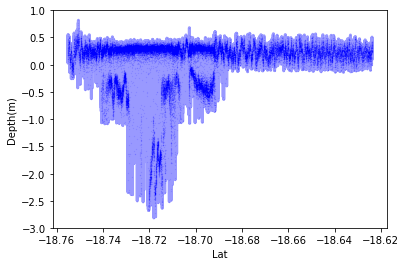

In [38]:

# sns.scatterplot(x = 'Latitude', y = 'Height', data = is2)
plt.plot(m.Latitude, m.Height, marker='o',color='blue', linewidth=3, markersize=0.1,alpha = 0.4)
plt.xlabel('Lat')
plt.ylabel('Depth(m)')

In [29]:
is2.Conf_ocean.value_counts()

4    53318
1     2494
0      308
3        7
2        1
Name: Conf_ocean, dtype: int64

In [35]:
m = is2.loc[is2.Conf_ocean == 4]

In [15]:
is2 = pd.read_csv(is2_fp)
# depth = pd.read_csv(depth_fp)

In [84]:
len(is2)

57142

In [85]:
depth = depth.dropna()
depth = depth[['Height', 'Latitude','Longitude']]

In [86]:
import src.Water_level as water_level
import numpy as np

In [104]:
f = water_level.get_water_level(is2)
is2 = is2.loc[(is2.Conf_ocean == 4) | (is2.Conf_land == 4)]
sea = f(is2.Latitude)
mean_sea = np.mean(sea)
is2.Height = (is2.Height - mean_sea)/1.33

In [105]:
len(is2)

56128

In [106]:
depth['Latitude'] = depth['Latitude'].round(4)
depth['Longitude'] = depth['Longitude'].round(4)
depth.head()

,Height,Latitude,Longitude
23,-8.353236,-18.7435,-178.4714
24,-8.353236,-18.7430,-178.4714
25,-6.855689,-18.7425,-178.4713
26,-2.374444,-18.7420,-178.4713
27,-1.451878,-18.7415,-178.4712


In [107]:
is2['Latitude'] = is2['Latitude'].round(4)
is2['Longitude'] = is2['Longitude'].round(4)
is2.head()

,Unnamed: 0,Height,Latitude,Longitude,Confidence,Conf_land,Conf_ocean
0,1617594,0.133326,-18.6238,-178.459,[ 4 4 -1 -1 4],4,4
2,1617596,0.243525,-18.6238,-178.459,[ 4 4 -1 -1 4],4,4
3,1617597,-0.023034,-18.6238,-178.459,[ 4 4 -1 -1 4],4,4
4,1617598,0.277509,-18.6238,-178.459,[ 4 4 -1 -1 4],4,4
5,1617599,0.160140,-18.6238,-178.459,[ 4 4 -1 -1 4],4,4


In [108]:
merged = is2[['Height','Latitude', 'Longitude']].merge(depth, on = ['Latitude','Longitude'],how = 'outer')

In [109]:
merged.to_csv('test.csv')

In [110]:
merged.sort_values('Latitude')

,Height_x,Latitude,Longitude,Height_y
56111,0.060740,-18.7552,-178.4727,NaN
56106,0.083409,-18.7552,-178.4727,NaN
56107,0.106600,-18.7552,-178.4727,NaN
56108,-0.046903,-18.7552,-178.4727,NaN
56109,0.158552,-18.7552,-178.4727,NaN
56110,0.182955,-18.7552,-178.4727,NaN
56112,-0.062719,-18.7552,-178.4727,NaN
56113,0.014639,-18.7552,-178.4727,NaN
56114,0.110298,-18.7552,-178.4727,NaN
56115,0.156087,-18.7552,-178.4727,NaN


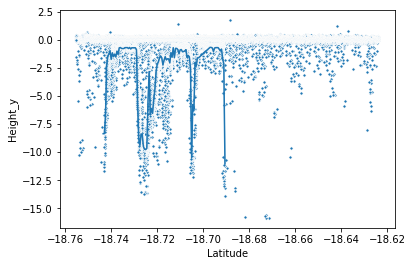

In [111]:
fig, ax = plt.subplots()
sns.scatterplot(x = 'Latitude', y= 'Height_x', data = merged, ax = ax, s=10)
sns.lineplot(x = 'Latitude', y= 'Height_y', data = merged, ax = ax)

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns